In [2]:
from IPython.html import widgets # Widget definitions
from IPython.display import display, clear_output # Used to display widgets in the notebook

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
'''Использованы куски отсюда:
matplotlib.sourceforge.net/examples/widgets/slider_demo.html'''
%pylab qt
import pylab as pl
from IPython import display
import numpy as np
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [1]:
#параметры
color1 = 'blue'
color2 = 'green'
axcolor = 'black'
mean1_init = 4
mean2_init = 6
threshold_init = 5

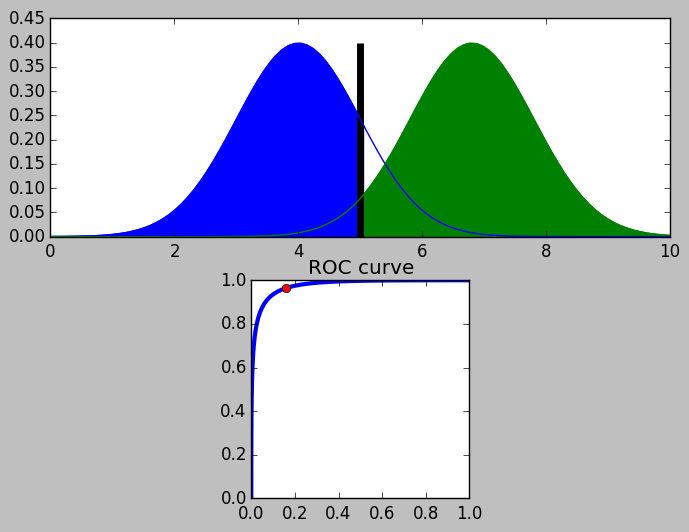

In [4]:
#Generate the x values that the two distributions will be plotted against 
x = pl.linspace(0,10,100) 

#Create the figure and two subplots
fig = pl.figure('ROC')
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212,aspect='equal',title='ROC curve',
        xlabel='1 - false negative',ylabel='true positive')


#plot gaussians
ax1.plot(x,stats.norm.pdf(x,loc=mean1_init),color=color1) 
ax1.plot(x,stats.norm.pdf(x,loc=mean2_init),color=color2) 

def roc_curve(threshold_values,mean1,mean2):
    tpr = np.zeros(threshold_values.size)
    fpr = np.zeros(threshold_values.size)
    for index, value in enumerate(threshold_values):
        tpr[index] = 1 - stats.norm.cdf(value,loc=mean2)
        fpr[index] = 1 - stats.norm.cdf(value,loc=mean1)
    return tpr,fpr

tpr,fpr = roc_curve(x,mean1_init,mean2_init)
ax2.plot(fpr,tpr,'b',linewidth=2)

#slider widgets
threshold = widgets.FloatSlider(threshold_init)
threshold.max = 10
threshold.description = "Threshold"
mean1     = widgets.FloatSlider(mean1_init)
mean1.max = 10
mean1.description = "Mean 1"
mean2     = widgets.FloatSlider(mean2_init)
mean2.max = 10
mean2.description = "Mean 2"

m1 = mean1_init
m2 = mean2_init

def update(val):
    
    global m1,m2,x
    m1 = mean1.value
    m2 = mean2.value
    thr = np.round(threshold.value,1)
    
    ax1.cla()

    ax1.plot(x,stats.norm.pdf(x,loc=m1),color = color1) 
    ax1.plot(x,stats.norm.pdf(x,loc=m2),color = color2) 
    
    tsig = x<=thr
    tbg = x>=thr
    tsig[sum(tsig)]= True
    
    
    
    ax1.fill_between(x[tsig],stats.norm.pdf(x[tsig],loc=m1),color = color1) 
    ax1.fill_between(x[tbg],stats.norm.pdf(x[tbg],loc=m2),color = color2) 
    
    
    ax1.vlines(thr,0,.4,linewidth = 5)
    ax1.set_ylim(0,0.45)

    ax2.cla()
    tpr,fpr = roc_curve(x,m1,m2)
    ax2.plot(fpr,tpr,'b',linewidth=3)
    ax2.plot( 1 - stats.norm.cdf(thr,loc=m1),
            1 - stats.norm.cdf(thr,loc=m2),'ro')
    ax2.set_title('ROC curve')
    display.clear_output(wait=True)
    display.display(pl.gcf())

mean1.on_trait_change(update)
mean2.on_trait_change(update)
threshold.on_trait_change(update)

print('Threshold')
display.display(threshold)
print('Mu signal')
display.display(mean1)
print('Mu background')
display.display(mean2)

update("")